In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [34]:
def tempreture_probability(tempreture,mu=20,sigma=7):
    
    #prob  = (1/((np.sqrt(2*np.pi))*sigma))* np.exp(-(((tempreture-mu)**2)/(2*sigma**2)))
    #prob = np.where(tempreture<=2,0,np.where(tempreture<=10,tempreture/10,np.where(tempreture<=23,1,0)))
    t1= 0.141*np.exp(tempreture/10) - 0.1
    t2 = (3.4/t1)-0.42
    prob = np.where(tempreture<0,0,np.where(tempreture<=20,t1,np.where(tempreture<=30,1,np.where(tempreture<=40,t2,0))))
    
    return prob

def humidity_probability(humidity,mu=50,sigma=12):
    
    #prob  = (1/((np.sqrt(2*np.pi))*sigma))* np.exp(-(((humidity-mu)**2)/(2*sigma**2)))
    h1 = 0.0322*np.exp(humidity/10)
    h2 = 2.7/h1 
    prob = np.where(humidity<35,h1,np.where(humidity<=45,1,h2))
    
    return prob

def wind_probability(speed):
    w1 = 3*np.exp(-speed/10) - 0.15
    prob = np.where(speed<=10,1,np.where(speed>=30,0,w1))
    return prob


def hour_probability(data_set):
    
    """This function returns 1 if the sun in sky, otherwise gives 0"""
    
    hour_prob = []
    
    for i in range(data_set.shape[0]):
        
        #get times as strings
        sunrise_str = data_set["Sunrise"][i].split()[1]
        sunset_str = data_set["Sunset"][i].split()[1]
        curr_time_str = data_set["Time"][i][:8]
        
        #get time strings as time objects
        sunrise = datetime.strptime(sunrise_str, '%H:%M:%S').time()
        sunset = datetime.strptime(sunset_str, '%H:%M:%S').time()
        curr_time = datetime.strptime(curr_time_str, '%H:%M:%S').time()
        
        #checks the current time and sunset and sunrise
        if(sunrise<=curr_time<=sunset):
            hour_prob.append(1.0)
        else:
            hour_prob.append(0.0)
            
    return hour_prob
            
       
    
def final_probability(data_set):
    
    #load weather description porbability data set
    weather_desc_data = pd.read_excel("./data/csv/weather_description_map.xlsx")
    # genarate weather probability using mean ratings
    weather_desc_data["Probability"] = (weather_desc_data["Mean Ratings"]-1)/(10-1)

    data_set["Weather condition prob"] = list(weather_desc_data[weather_desc_data["Weather ID"]==list(data_set["Weather ID"])[0]]["Probability"])[0]

    
    #hour probability
    hour_prob_arr = hour_probability(data_set)
    data_set["hour prob"] = hour_prob_arr
    
    data_set["tempreture prob"] = data_set["Tempreture"].apply(tempreture_probability)
    data_set["humidity prob"] = data_set["Humidity"].apply(humidity_probability)
    data_set["wind prob"] = data_set["Wind speed"].apply(wind_probability)
    prob = np.array(data_set["tempreture prob"]*data_set["humidity prob"]*data_set["wind prob"]* data_set["Weather condition prob"]*data_set["hour prob"])
    data_set["Weather Prob"] = prob
    
   

In [56]:
weather_desc_data = pd.read_excel("./data/csv/weather_description_map.xlsx")
weather_desc_data.head()

Weather ID Weather ID group         Weather ID description  Mean Ratings
0         200     Thunderstorm  thunderstorm with light rain            4.0
1         201     Thunderstorm        thunderstorm with rain            2.5
2         202     Thunderstorm  thunderstorm with heavy rain            1.0
3         210     Thunderstorm             light thunderstorm           4.5
4         211     Thunderstorm                  thunderstorm            5.0

In [35]:
data_set = pd.read_csv("./results/csv/weather_dataset.csv")

In [36]:
data_set.head()

Date         Time  Id   Longitude   Latitude  Tempreture  Humidity  \
0  2023-11-28  22:53:55.60   1  143.251973 -35.083201       16.92        89   
1  2023-11-28  22:53:55.60   2  143.251973 -35.084201       16.92        89   
2  2023-11-28  22:53:55.60   3  143.251973 -35.085201       16.92        89   
3  2023-11-28  22:53:55.60   4  143.251973 -35.086201       16.92        89   
4  2023-11-28  22:53:56.49   5  143.251973 -35.087201       16.93        89   

   Wind speed  Weather ID Weather ID group Weather ID description  \
0        5.48         500             Rain             light rain   
1        5.48         500             Rain             light rain   
2        5.48         500             Rain             light rain   
3        5.48         500             Rain             light rain   
4        5.45         500             Rain             light rain   

               Sunrise               Sunset  Solar activation sconds  
0  2023-11-28 05:07:11  2023-11-28 19:22:34                    51323  
1  2023-11-28 05:07:11  2023-11-28 19:22:34                    51323  
2  2023-11-28 05:07:11  2023-11-28 19:22:34                    51323  
3  2023-11-28 05:07:11  2023-11-28 19:22:34                    51323  
4  2023-11-28 05:07:11  2023-11-28 19:22:35                    51324

In [37]:
data_set.shape[0]

3960

In [38]:
data_set.shape

(3960, 14)

In [39]:
data_set.isnull().sum()

Date                       0
Time                       0
Id                         0
Longitude                  0
Latitude                   0
Tempreture                 0
Humidity                   0
Wind speed                 0
Weather ID                 0
Weather ID group           0
Weather ID description     0
Sunrise                    0
Sunset                     0
Solar activation sconds    0
dtype: int64

### Tempreture curve 

Text(0, 0.5, 'probability')

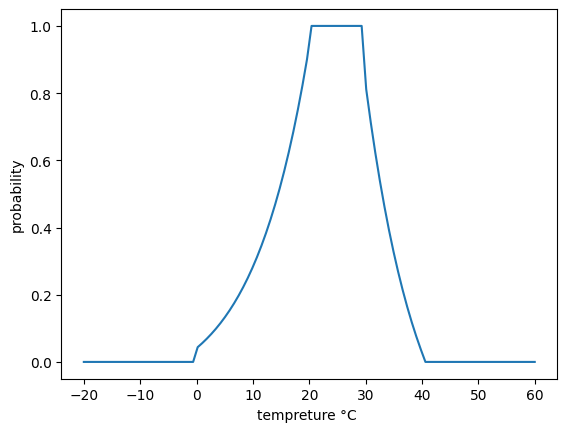

In [40]:
tempreture = np.linspace(-20,60,100)
pdf = tempreture_probability(tempreture,20,7)
plt.plot(tempreture,pdf)
plt.xlabel("tempreture °C ")
plt.ylabel("probability")

### Humidity curve

Text(0, 0.5, 'probability')

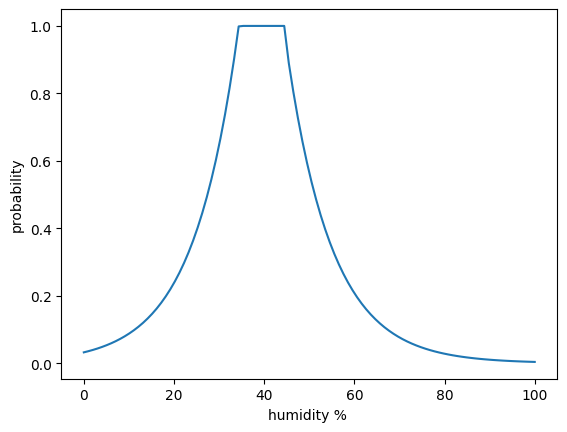

In [41]:
#data_set["Probability"] = prob
humidity = np.linspace(0,100,100)
pdf1 = humidity_probability(humidity,50,12)
plt.plot(humidity,pdf1)
plt.xlabel("humidity % ")
plt.ylabel("probability")

### Wind speed curve

Text(0, 0.5, 'probability')

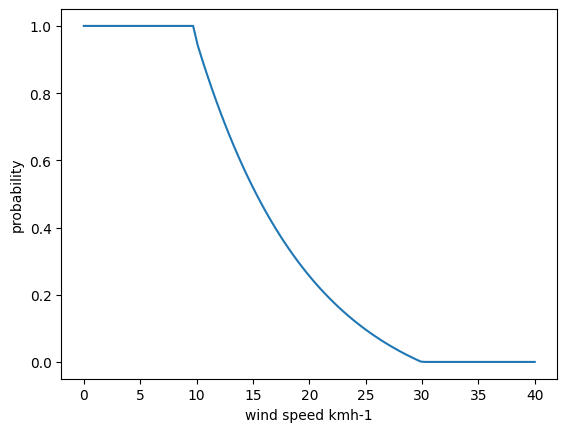

In [42]:
speed_arr = np.linspace(0,40,100)
prob  = wind_probability(speed_arr)

plt.plot(speed_arr,prob)
plt.xlabel("wind speed kmh-1")
plt.ylabel("probability")

In [43]:
final_probability(data_set)

In [44]:
data_set.head(100)

Date         Time   Id   Longitude   Latitude  Tempreture  Humidity  \
0   2023-11-28  22:53:55.60    1  143.251973 -35.083201       16.92        89   
1   2023-11-28  22:53:55.60    2  143.251973 -35.084201       16.92        89   
2   2023-11-28  22:53:55.60    3  143.251973 -35.085201       16.92        89   
3   2023-11-28  22:53:55.60    4  143.251973 -35.086201       16.92        89   
4   2023-11-28  22:53:56.49    5  143.251973 -35.087201       16.93        89   
..         ...          ...  ...         ...        ...         ...       ...   
95  2023-11-28  22:54:18.99   96  143.252973 -35.118201       16.81        90   
96  2023-11-28  22:54:19.91   97  143.252973 -35.119201       16.81        90   
97  2023-11-28  22:54:19.91   98  143.252973 -35.120201       16.81        90   
98  2023-11-28  22:54:19.91   99  143.252973 -35.121201       16.81        90   
99  2023-11-28  22:54:19.91  100  143.252973 -35.122201       16.81        90   

    Wind speed  Weather ID Weather ID group Weather ID description  \
0         5.48         500             Rain             light rain   
1         5.48         500             Rain             light rain   
2         5.48         500             Rain             light rain   
3         5.48         500             Rain             light rain   
4         5.45         500             Rain             light rain   
..         ...         ...              ...                    ...   
95        5.30         500             Rain             light rain   
96        5.30         500             Rain             light rain   
97        5.30         500             Rain             light rain   
98        5.30         500             Rain             light rain   
99        5.30         500             Rain             light rain   

                Sunrise               Sunset  Solar activation sconds  \
0   2023-11-28 05:07:11  2023-11-28 19:22:34                    51323   
1   2023-11-28 05:07:11  2023-11-28 19:22:34                    51323   
2   2023-11-28 05:07:11  2023-11-28 19:22:34                    51323   
3   2023-11-28 05:07:11  2023-11-28 19:22:34                    51323   
4   2023-11-28 05:07:11  2023-11-28 19:22:35                    51324   
..                  ...                  ...                      ...   
95  2023-11-28 05:07:06  2023-11-28 19:22:39                    51333   
96  2023-11-28 05:07:06  2023-11-28 19:22:39                    51333   
97  2023-11-28 05:07:06  2023-11-28 19:22:39                    51333   
98  2023-11-28 05:07:06  2023-11-28 19:22:39                    51333   
99  2023-11-28 05:07:06  2023-11-28 19:22:39                    51333   

    Weather condition prob  hour prob  tempreture prob  humidity prob  \
0                 0.166667        0.0         0.665677       0.011436   
1                 0.166667        0.0         0.665677       0.011436   
2                 0.166667        0.0         0.665677       0.011436   
3                 0.166667        0.0         0.665677       0.011436   
4                 0.166667        0.0         0.666443       0.011436   
..                     ...        ...              ...            ...   
95                0.166667        0.0         0.657300       0.010348   
96                0.166667        0.0         0.657300       0.010348   
97                0.166667        0.0         0.657300       0.010348   
98                0.166667        0.0         0.657300       0.010348   
99                0.166667        0.0         0.657300       0.010348   

    wind prob  Weather Prob  
0         1.0           0.0  
1         1.0           0.0  
2         1.0           0.0  
3         1.0           0.0  
4         1.0           0.0  
..        ...           ...  
95        1.0           0.0  
96        1.0           0.0  
97        1.0           0.0  
98        1.0           0.0  
99        1.0           0.0  

[100 rows x 20 columns]

In [45]:
data_set.to_csv("./results/csv/weather_probability_data.csv", index=False)

###   Experiment

In [46]:
data_set1 = pd.read_csv("../spatial/results/csv/Grid PDF PI.csv")
data_set2 = pd.read_csv("./results/csv/weather_probability_data.csv")

data_set = pd.merge(data_set1,data_set2, on='Id')

product_prob = np.array(data_set["Weather Prob"]*data_set["Spatial Prob"])
#product_prob = np.array(1*data_set["Spatial Prob"])

#normalized_product_prob = (product_prob- np.min(product_prob))/(np.max(product_prob) - np.min(product_prob))
data_set["Final prob"] = product_prob

In [47]:
data_set2.shape

(3960, 20)

In [48]:
product_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
print(min(product_prob))
print(max(product_prob))

0.0
0.0


In [50]:
drop_features = ["Probability index(PI)","Longitude_y","Latitude_y","Sunrise","Sunset"]
col_order = ["Id","Longitude_x","Latitude_x","Date","Time","Tempreture","Humidity","Wind speed","Weather ID","Weather ID group","Weather ID description","Solar activation sconds","Weather condition prob","hour prob","tempreture prob","humidity prob","wind prob","Weather Prob","Spatial Prob","Final prob"]
final_data_set = data_set.drop(columns=drop_features, axis=1)
final_data_set = final_data_set[col_order]

In [51]:
final_data_set.head() 

Id  Longitude_x  Latitude_x        Date         Time  Tempreture  Humidity  \
0   1   143.251973  -35.083201  2023-11-28  22:53:55.60       16.92        89   
1   2   143.251973  -35.084201  2023-11-28  22:53:55.60       16.92        89   
2   3   143.251973  -35.085201  2023-11-28  22:53:55.60       16.92        89   
3   4   143.251973  -35.086201  2023-11-28  22:53:55.60       16.92        89   
4   5   143.251973  -35.087201  2023-11-28  22:53:56.49       16.93        89   

   Wind speed  Weather ID Weather ID group Weather ID description  \
0        5.48         500             Rain             light rain   
1        5.48         500             Rain             light rain   
2        5.48         500             Rain             light rain   
3        5.48         500             Rain             light rain   
4        5.45         500             Rain             light rain   

   Solar activation sconds  Weather condition prob  hour prob  \
0                    51323                0.166667        0.0   
1                    51323                0.166667        0.0   
2                    51323                0.166667        0.0   
3                    51323                0.166667        0.0   
4                    51324                0.166667        0.0   

   tempreture prob  humidity prob  wind prob  Weather Prob  Spatial Prob  \
0         0.665677       0.011436        1.0           0.0      0.036364   
1         0.665677       0.011436        1.0           0.0      0.067949   
2         0.665677       0.011436        1.0           0.0      0.101244   
3         0.665677       0.011436        1.0           0.0      0.111771   
4         0.666443       0.011436        1.0           0.0      0.089382   

   Final prob  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [52]:
final_data_set.shape

(3960, 20)

In [53]:
final_data_set.to_csv("./results/csv/final_dataset.csv")


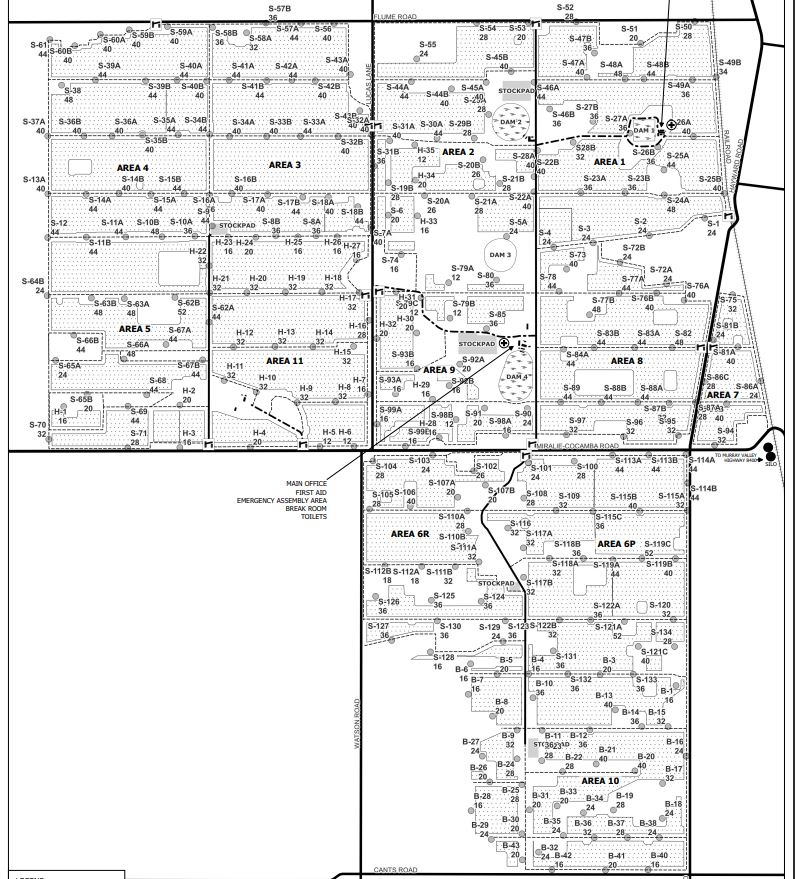

In [54]:
import folium
from folium import IFrame
from folium.raster_layers import ImageOverlay
from shapely.geometry import Point
from folium import plugins

latitudes = data_set["Latitude_y"]
longitudes = data_set["Longitude_y"]
probability_values = data_set["Final prob"]*10


# Create a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]

# Create a base map with satellite tiles
m = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)],
               zoom_start=14,
               tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
               attr='Google Satellite',
               width='100%',
               height='100%')

# Convert coordinates and probabilities to list of lists
heat_data = [[point.xy[1][0], point.xy[0][0], prob] for point, prob in zip(geometry, probability_values)]

# Add the heatmap layer using the list of lists
plugins.HeatMap(heat_data, radius=20, blur=20, min_opacity=0.0,).add_to(m)  # Adjust min_opacity here

# Add your own image as an overlay
image_path = './images/study_area.JPG'
overlay = ImageOverlay(
    image_path,
    bounds=[[min(latitudes), min(longitudes)], [max(latitudes), max(longitudes)]],
    opacity=0.5
)
overlay.add_to(m)

# Save the map to an HTML file (optional)
m.save('./results/maps/custom_image_overlay_map_only_spatial_data4.html')

# Display the map
m


In [55]:
len(latitudes)

3960